In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import math 

In [2]:
def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.2989, 0.5870, 0.1140])

In [3]:
img = mpimg.imread('joconde.jpg')  

In [4]:
gray = rgb2gray(img)

In [ ]:
gray_tmp = np.copy(gray)

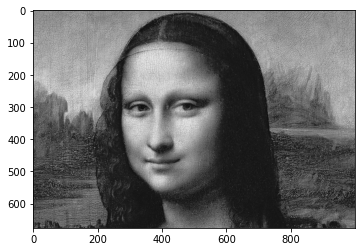

In [5]:
plt.imshow(gray, cmap=plt.get_cmap('gray'))
plt.show()

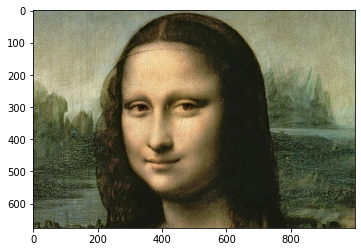

In [6]:
plt.imshow(img)
plt.show()

In [31]:
def crop_image_circle(image,center,radius):
    gray_tmp = np.copy(gray)
    for i in range(gray_tmp.shape[0]):
        for j in range(gray_tmp.shape[1]):
            distance_2 = math.sqrt(pow(center[0]-i,2) + pow(center[1]-j,2))
            if distance_2 > radius:
                gray_tmp[i][j] = 255
    return gray_tmp

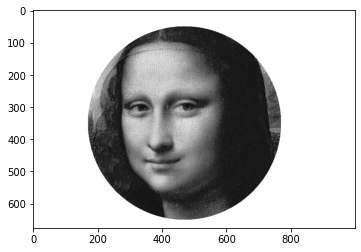

In [32]:
center = [350,470]
radius = 300
gray_crop = crop_image_circle(gray,center,radius)
plt.imshow(gray_crop, cmap=plt.get_cmap('gray'))
plt.show()

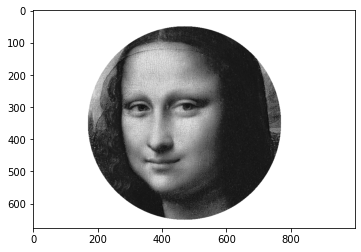

In [28]:
center = [350,470]
radius = 300
gray_crop = crop_image_circle(gray,center,radius)
plt.imshow(gray_crop, cmap='gray',vmin=0, vmax=255)
plt.show()

In [11]:
def generate_nail_positions(center, radius, number):
    x = [center[0] + radius*math.cos(n*2*math.pi/number) for n in range(number)]
    y = [center[1] + radius*math.sin(n*2*math.pi/number) for n in range(number)]
    return [[int(x[i]),int(y[i])] for i in range(number)]

In [14]:
generate_nail_positions(center,radius,10)

[[650, 470],
 [592, 646],
 [442, 755],
 [257, 755],
 [107, 646],
 [50, 470],
 [107, 293],
 [257, 184],
 [442, 184],
 [592, 293]]

In [ ]:
gray_tmp = np.copy(gray)

In [39]:
def add_line(line, image):
    max_x = max(line[0][0],line[1][0])
    max_y = max(line[0][1],line[1][1])
    min_x = min(line[0][0],line[1][0])
    min_y = min(line[0][1],line[1][1])
    tmp = np.copy(image)
    for i in range(tmp.shape[0]):
        for j in range(tmp.shape[1]):
            if i > max_x + 0.5:
                continue
            if j > max_y + 0.5:
                continue
            if i < min_x - 0.5:
                continue
            if j < min_y - 0.5:
                continue
            distance = distance_point_line([i,j],line)
            if distance < 0.5:
                tmp[i][j] = 0.1*min(255,image[i][j])
    return tmp
                

In [36]:
m = gray[0][0]
for i in range(gray.shape[0]):
    for j in range(gray.shape[1]):
        m = min(m,gray[i][j])
print(m)

0.587


In [37]:
plt.get_cmap('gray')

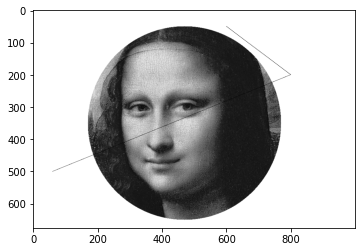

In [40]:
gray_crop2 = add_line([[50,600],[200,800]],gray_crop)
gray_crop3 = add_line([[500,60],[200,800]],gray_crop2)
plt.imshow(add_line(line,gray_crop3), cmap=plt.get_cmap('gray'))
plt.show()

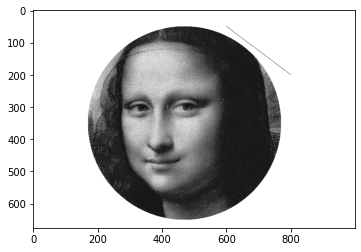

In [21]:
line = [[50,600],[200,800]]
plt.imshow(add_line(line,gray_crop), cmap=plt.get_cmap('gray'))
plt.show()

In [16]:
def distance_point_line(point,line):
    point1 = line[0]
    point2 = line[1]
    if (abs(point2[0]-point1[0])>0.0001):
        delta = (point2[1]-point1[1]) / (point2[0]-point1[0])
        a = -delta
        b = 1
        c = point1[0]*delta-point1[1]
        distance = abs(a*point[0]+b*point[1]+c)/math.sqrt(pow(a,2)+pow(b,2))
    else:
        # vertical line
        distance = abs(point[0]-point1[0])
    return distance

In [ ]:
distance_point_line([1,2],[[0,0],[0,3]])

In [ ]:
point = [1,1]
line = 